In [4]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(42)
from math import gamma, e

### Exercise 2.8: Generate Beta distribution using Uniform

1. We sample Uniform vector
 

In [30]:
def exp_sampler(lam):
    unif = rng.uniform(0, 1)
    exp = -np.log(1-unif) / lam
    return exp

def gamma_pdf(x, alpha):
    return (x**(alpha-1) * e**(-x) / (gamma(alpha)))

def exp_pdf(x, lam):
    return lam * e**(-lam*x)

def gamma_sampler(alpha, n):
    acc_x = np.array([])
    M = (alpha**alpha * e**(-alpha+1)) / gamma(alpha)
    while len(acc_x) < n:
        xi = exp_sampler(1/alpha)
        ui = rng.uniform(0, 1)
        if ui <= gamma_pdf(xi, alpha) / (M*exp_pdf(xi, 1/alpha)):
            acc_x = np.append(acc_x, xi)
    return acc_x

def beta_sampler(alpha, beta, n):
    x1 = gamma_sampler(alpha, n)
    x2 = gamma_sampler(beta, n)
    b = x1 / (x1+x2)
    return b

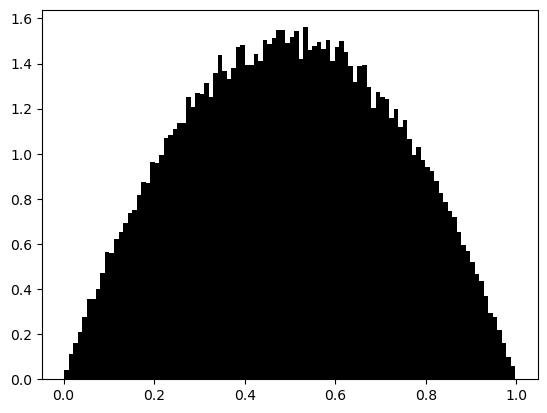

In [31]:
alpha = 2
beta = 2

rng = np.random.default_rng(5)

xx = np.linspace(0, 1, 1000)

n = 100000
b = beta_sampler(alpha, beta, n)
plt.hist(b, bins=100, density=True, color='k')
plt.show()